 # Problem 1: Python & Data Exploration

In [19]:
import numpy as np
import matplotlib.pyplot as pt

iris = np.genfromtxt("iris.txt")
Y = iris[:, -1]
X = iris[:, :-1]

data_points, features = X.shape
data_points, features

(148, 4)

 ## 1. Data points and features

 Number of data points: 148

 Number of features: 4

 ## 2. Histogram of values

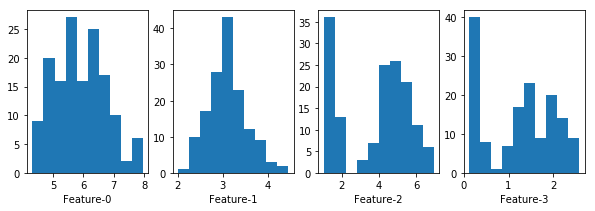

In [20]:
_fig, plots = pt.subplots(1, features, figsize=(10, 3))
for i in range(features):
    plots[i].hist(X[:, i])
    plots[i].set_xlabel("Feature-{}".format(i))


 ## 3. Mean and SD of features

In [21]:
for i in range(features):
    print("Feature {}: Mean = {}, SD = {}".format(
        i, np.mean(X[:, i]), np.std(X[:, i]))
    )


Feature 0: Mean = 5.900103764189188, SD = 0.833402066774894
Feature 1: Mean = 3.098930916891892, SD = 0.43629183800107685
Feature 2: Mean = 3.8195548405405404, SD = 1.7540571093439352
Feature 3: Mean = 1.2525554845945945, SD = 0.7587724570263247


 ## 4. Scatter plot for pairs of features

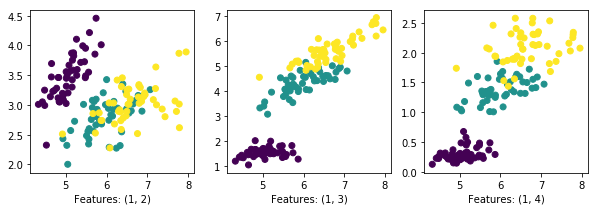

In [22]:
_fig, plots = pt.subplots(1, 3, figsize=(10, 3),)
for index, (x, y) in enumerate(((1, 2), (1, 3), (1, 4))):
    plots[index].scatter(x=X[:, x-1], y=X[:, y-1], c=Y[:])
    plots[index].set_xlabel("Features: ({}, {})".format(x, y))


 # Problem 2:  kNN predictions

 ## 1. Classification boundary for varying values of K = [1, 5, 10, 50] for features (1, 2)

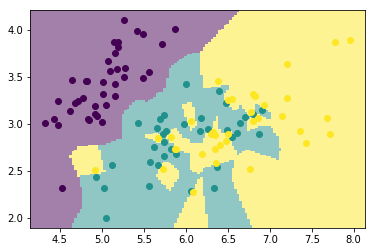

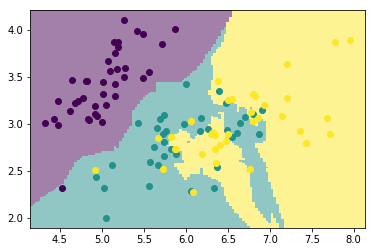

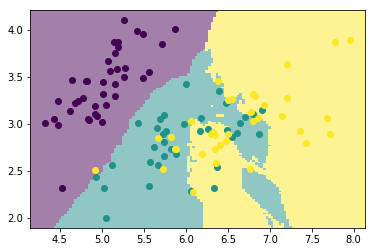

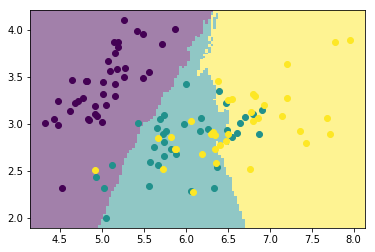

In [23]:
import mltools as ml
np.random.seed(0)
X, Y = ml.shuffleData(X, Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X[:, :2], Y, 0.75)
knn = ml.knn.knnClassify()
for K in (1, 5, 10, 50):
    knn.train(Xtr, Ytr, K)
    ml.plotClassify2D(knn, Xtr, Ytr)


 ## 2. The error rate (number of misclassifications) on both the training and validation data as a function of K = [1, 2, 5, 10, 50, 100, 200] for features (1, 2).

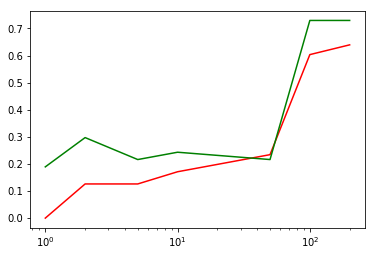

In [26]:
Xtr, Xva, Ytr, Yva = ml.splitData(X[:, :2], Y, 0.75)
K_values = [1, 2, 5, 10, 50, 100, 200]
errTrain = [0] * len(K_values)
errVal = [0] * len(K_values)
for i, K in enumerate(K_values):
    learner = ml.knn.knnClassify(Xtr, Ytr, K)
    YvaHat = learner.predict(Xva)
    YtrHat = learner.predict(Xtr)
    errTrain[i] = np.count_nonzero(YtrHat != Ytr) / len(Ytr)
    errVal[i] = np.count_nonzero(YvaHat != Yva) / len(Yva)

pt.semilogx(K_values, errTrain, 'red')
pt.semilogx(K_values, errVal, 'green')
pt.show()


 ### Looking at the plots, **K = 10** has the ideal range for model complexity. Hence **K=10** is the recommended value for the features (1,2).

 ## 3. The error rate (number of misclassifications) on both the training and validation data as a function of K = [1, 2, 5, 10, 50, 100, 200] for all features.

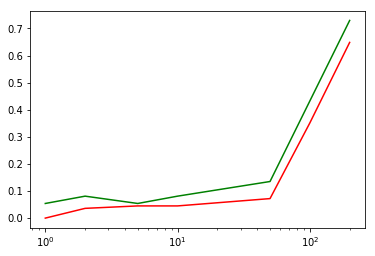

In [27]:
X, Y = ml.shuffleData(X, Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.75)
errTrain = [0] * len(K_values)
errVal = [0] * len(K_values)
for i, K in enumerate(K_values):
    learner = ml.knn.knnClassify(Xtr, Ytr, K)
    YvaHat = learner.predict(Xva)
    YtrHat = learner.predict(Xtr)
    errTrain[i] = np.count_nonzero(YtrHat != Ytr) / len(Ytr)
    errVal[i] = np.count_nonzero(YvaHat != Yva) / len(Yva)

pt.semilogx(K_values, errTrain, 'red')
pt.semilogx(K_values, errVal, 'green')
pt.show()


 ### Looking at the plots, **K = 10** has the ideal range for model complexity. Hence **K=10** is the recommended value for all the features as well.
 ### However, here the value of K is not as good a fit as it was for features (1, 2). We could experiment with a K such that 10 < K < 50 to arrive at a better fit for the model.

 # Problem 3: Naïve Bayes Classifiers